# 1. Random Forest Algorithm
We are now going to touch on the **random forest** algorithm, which touches on earlier concepts we have gone over. Recall, if we have $B$ **independent** and **identically** distributed variables, each with a variance $\sigma^2$, then the sum (or equivalently the sample mean) of the random variables has a variance:

#### $$var(\bar{\theta}_B) = \frac{1}{B}\sigma^2$$

However, recall that this is not the case when the $B$ random variables are only **identically distributed**, and **not independent**. In this case there may be a correlation between two random variables, which we will call $\rho$; the variance of the **sum** or **sample mean** is given by this equation: 

#### $$var(\bar{\theta}_B) = \frac{1- \rho}{B}\sigma^2  + \rho \sigma^2$$

The main goal of random forest is to try and **reduce this correlation**. In other words, it tries to build a set of trees that are decorrelated from eachother. 

Recall that the idea behind *bagging* was to average the results from high variance/low bias models. Trees are perfect for that because they can go arbitrarily deep, and capture complex interactions. Much of the time, they can achieve 100% accuracy on the training set, and hence have 0 bias. We want this because then $\rho$ will be 0! At the same time, this results in them having a high variance. But due to the previous equation for the variance of an ensemble, we can achieve a much lower combined variance by finding trees that are not correlated with eachother. 

A good question to ask at this point is: "is there anything more deliberate we can do to make sure each tree is decorrelated from the others, rather than just assuming that trees grown to maximum depth on different bootstrap samples will be very different?" We will see how to do that soon!

---
<br>
## 1.1 Random Forest - Bias
We know that we can achieve low bias easily with trees because the more nodes we add, the more it will overfit. So, let's suppose that each tree has zero bias. Since each tree has the same expected value, then the expected value of an ensemble of trees is the same, and thus the bias remains the same too. This can be seen in the equation below - all estimates of $f$, $\hat{f}$, are going to have the same expected value: 

#### $$\bar{f}(x) = E\Big[\hat{f}(x)\Big]$$

(This can be seen in the previous section **1.5.1 Mean Derivation**).

And we can see that $bias^2$ is simply the ground truth function $f$ (which doesn't change) minus the expected value of the estimate, $\bar{f}$. 

#### $$bias^2 = \Big[f(x) - \bar{f}(x)\Big]^2$$

We will see later with **boosting** another way of combining trees with high bias. 

---
<br>
## 1.2 Random Forest - Decorrelation
So, how does Random Forest try to decorrelate it's trees? In the same way that we can select which samples to train on, we can also **randomly select which features to train** on too! So, if you think of the data matrix $X$, one way to get different trees is to sample different rows, which we have done already. Another way is to sample different columns, which is equivalent to training a tree on only a subset of features. 

We usually choose a dimensionality $d << D$, assuming that $X$ is an **(N x D)** matrix. The inventors of random forest recommend the following settings for $d$:

#### $$Classification: d = floor(\sqrt{D})$$
#### $$Regression: d = floor(\frac{D}{3})$$

For classification note that it can be set as low as 1. For regression it can be set as low as 5. As always, by using a method like cross validation you can see what works best for your specific dataset. 

---
<br>
## 1.3 Random Forest - Algorithm
The algorithm for random forest training is as follows:

```
for b = 1..B:                              # We loop B times
    Xb, Yb = sample_with_replacement(X, Y) # Draw sample w/ replacement
    model = DecisionTree()                 # Create a new tree
    
    # We do not train tree here in usual way, instead we loop until we 
    # hit a terminal node or preset maximum depth. This loop could also
    # be recursion, as we did in the supervised learning walkthroughs
    
    while not at terminal node and not reached max_depth:
        
        # Each iteration, select d features randomly from the total set 
        # features, and for these features we choose the best split 
        # using a criterion like maximum information gain. 
        select d features randomly         
    
        # We then add this split to the current tree, and keep recursing 
        # until the tree is complete (hit leaf node or max depth)
        add split to model
        
    models.append(model)                     # Add model to list of models
```

A few things are worth noting here. 
1. First, this is just like **bagging**, expcept that in addition to getting a bootstrap sample from the training set on each round, **we also sample the features too**. People will sometimes refer to this as **feature bagging**.  
2. Second, these are not ensembles of plain vanilla decision trees, as we did with the bagged tree. This is because we are **modifying the decision tree algorithm** by changing how they split. In particular, we are not allowing them to search the entire feature list. So, we can't build a random forest using the built in decision tree class. For this reason, we will not write the random forest from scratch in this walkthrough. 

---
<br>
## 1.4 Random Forest - Prediction
We have already touched on how to do predictions for ensembles. For binary classification you can just round the average, and for regression you can just output the average. Since we have already covered that before we won't do it again here. The main complication with random forests is just the train function.  

---
<br>
## 1.5 Random Forest - Training
We will be using the **Scikit Learn** random forest to code this out going forward. There are a few things to note about this, found in the docs here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

> * First, you can see that the number of trees by default is 10 for both classification and regression. 
* If you look at the splitting criterion, you will see that the classifier uses **gini impurity**, while the regressor uses **mean squared error**
* Gini impurity has the same shape as entropy, so it's not a big deal 
* The **max features** argument tells the random forest how many features to sample on each split. Notice that the default is the square root of D for classification, but the default for regression is equal to D. This does not follow the recommendation to using $\frac{D}{3}$
* As we continue to go down, there are a lot of options related to how to build the tree. For instance there is **maximum_depth** which is by default none, **min_samples_split**, **min_samples_leaf**, and the **max_leaf_nodes**. Notice how a lot of these inputs pertain to the tree and not the forest. 

---
<br>
## 1.6 Random Forest - Problems
A big question that comes up in machine learing is what is a lot of the predictors/input features are irrelevant and just noise? If most of the features are just noise, what happens to random forest if when it randomly chooses input features it chooses only noise. And, what if it does this for a large proportion of trees. For example, if we have **3 relevant variables** and **100 irrelevant variables**, and we have d equal $floor(\sqrt{103}) = 10$, then what is the probability that we chose at least one relevant variable? 

#### $$1 - \frac{100}{103} * \frac{99}{102} * ...* \frac{91}{94} = 0.266$$

26% actually is not terrible, considering we only had 3 relevant variables. If we had 6 relevant variables, the probability would go up to 46%. It is, however, still a a problem if the number of relevant variables is small. Soon we will talk about an algorithm called **boosting** which fixes this problem. 

---
<br>
## 1.7 Random Forest - Advantages
One big advantage of **random forests** is that they require very little tuning. Research has show that you can let all of the trees have arbitrary depth without incurring very much penalty. They perform well, and they are fast, making them ideal for many situations. This is why it is often recommended vs. deep learning for more basic and broad use cases. Neural networks can yield very different results based on the selected hyperparameters, and on top of that there are many more options. Hence, random forests are the way to go if you are looking for a plug and play solution. 

---

<br>
# 2. Random Forest Regression - Code
We are now going to apply the random forest regressor to real data. It is now that we will stop looking at 2d plots for regression for 2 reasons. 
1. We already know the smoothing effect that ensembling has on the decision tree predictions because of the plots we did earlier. 
2. The main trick of random forest is that is selects a subset of features at each tree split, but a 2d plot only has 1 feature to choose from, making this main feature obselete. 

Let's start with our imports.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression       # Will compare LR as baseline
from sklearn.tree import DecisionTreeRegressor          # Will also compare single Dtree
from sklearn.model_selection import cross_val_score

# Seaborn Plot Styling
sns.set(style="white", palette="husl")
sns.set_context("poster")
sns.set_style("ticks")

Next we can define constants for our column names:

In [48]:
NUMERICAL_COLS = [
  'crim', # numerical
  'zn', # numerical
  'nonretail', # numerical
  'nox', # numerical
  'rooms', # numerical
  'age', # numerical
  'dis', # numerical
  'rad', # numerical
  'tax', # numerical
  'ptratio', # numerical
  'b', # numerical
  'lstat', # numerical
]

NO_TRANSFORM = ['river']      # Do not want to transform river, since it is already 0 or 1 

Define our `DataTransformer` class. This works like Scikit learns scaler classes (normalizes by subtracting mean and dividing by std or variance), which have the functions `fit`, `transform`, and `fit_transform`. This transforms data from dataframe to numerical matrix. We want to use the scales found in training when transforming the test set, so we only call `fit()` once, and call `transform()` for any subsequent data.

We want to be able to transform without fitting, because when we find the mean and variance of a feature, we only want to use the train set for that. When we transform the test set we want to use only the means and variances that we have already found. 

Documentation can be found specifically related to this here: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [53]:
class DataTransformer:
    """fit finds the mean and variance"""
    def fit(self, df):
        self.scalers = {}
        for col in NUMERICAL_COLS:
            scaler = StandardScaler()                          # Sklearn standard scaler
            scaler.fit(df[col].as_matrix().reshape(-1, 1))
            self.scalers[col] = scaler

    """transform subtracts by the mean and divides by the variance, converts to np array"""
    def transform(self, df):
        N, _ = df.shape
        D = len(NUMERICAL_COLS) + len(NO_TRANSFORM)
        X = np.zeros((N, D))
        i = 0
        for col, scaler in self.scalers.items():
            X[:,i] = scaler.transform(df[col].as_matrix().reshape(-1, 1)).flatten()
            i += 1
        for col in NO_TRANSFORM:
            X[:,i] = df[col]
            i += 1
        return X

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

Now we can write our function to get the data. The dataset is similar to a CSV, but each value is separated by an arbitrary number of spaces. 

In [54]:
def get_data():
  # Regex allows arbitrary number of spaces in separator (sep=r"\s*")
  # To use this regex, must use python engine
  df = pd.read_csv('./data/housing.data', header=None, sep=r"\s*", engine='python')
  
  # Renamining columns manually
  df.columns = [
    'crim', # numerical
    'zn', # numerical
    'nonretail', # numerical
    'river', # binary
    'nox', # numerical
    'rooms', # numerical
    'age', # numerical
    'dis', # numerical
    'rad', # numerical
    'tax', # numerical
    'ptratio', # numerical
    'b', # numerical
    'lstat', # numerical
    'medv', # numerical -- this is the target
  ]

  # Transform data - create an instance of DataTransformer
  transformer = DataTransformer()

  # Shuffle the data and split into 70% train, 30% test
  N = len(df)
  train_idx = np.random.choice(N, size=int(0.7*N), replace=False)
  test_idx = [i for i in range(N) if i not in train_idx]
  df_train = df.loc[train_idx]
  df_test = df.loc[test_idx]

  # Take the log of the targets (median house price). This is a common operation for 
  # scaling numerical columns that have large ranges, but you care about how correct you are
  # relative to the value. What we mean by that is if you have a house that is priced at 
  # $10,000 and your prediction is $5,000 you prediction is very wrong. However, if the house
  # was priced at $1,000,000 and your prediction was $5,000 off you don't care as much
  Xtrain = transformer.fit_transform(df_train)
  Ytrain = np.log(df_train['medv'].as_matrix())
  Xtest = transformer.transform(df_test)
  Ytest = np.log(df_test['medv'].as_matrix())
  return Xtrain, Ytrain, Xtest, Ytest

We can now enter our main loop:

/usr/local/lib/python3.6/site-packages/pandas/io/parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/usr/local/lib/python3.6/site-packages/pandas/io/parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


ymin: 2.0 ymax: 4.0


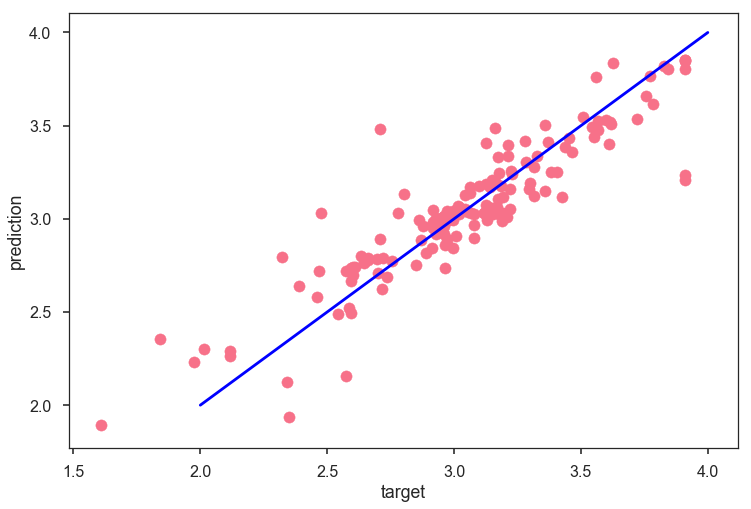

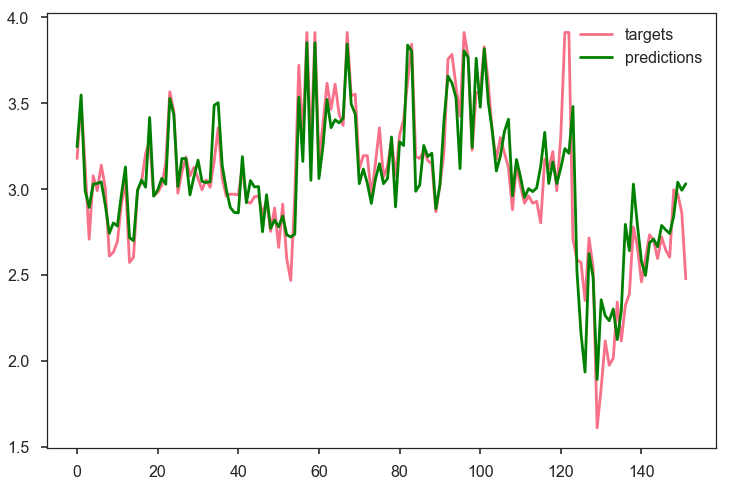

CV single tree: 0.7627342797438036
CV baseline: 0.7696955274061493
CV forest: 0.8370560373592532
test score single tree: 0.5829399527321669
test score baseline: 0.7824358648686986
test score forest: 0.8192645918177106


In [72]:
def run_experiment():
  Xtrain, Ytrain, Xtest, Ytest = get_data()      # Get our data
  
  # Create an instance of random forest regressor
  model = RandomForestRegressor(n_estimators=100) # Try 10, 20, 50, 100, 200
  model.fit(Xtrain, Ytrain) 
  predictions = model.predict(Xtest)

  # Plot predictions vs targets
  # First plot - targets along x axis, predictions along y axis, if accurate should be near 
  # line y = x, so we plot that too
  fig, ax = plt.subplots(figsize=(12,8))
  plt.scatter(Ytest, predictions)
  plt.xlabel("target")
  plt.ylabel("prediction")
  ymin = np.round( min( min(Ytest), min(predictions) ) )
  ymax = np.ceil( max( max(Ytest), max(predictions) ) )
  print("ymin:", ymin, "ymax:", ymax)
  r = range(int(ymin), int(ymax) + 1)
  plt.plot(r, r, color='blue')
  plt.show()

  # Create plot of targets and predictions as line charts 
  fig, ax = plt.subplots(figsize=(12,8))
  plt.plot(Ytest, label='targets')
  plt.plot(predictions, label='predictions', color="green")
  plt.legend()
  plt.show()

  # Cross validation on all models
  # Training set baseline test
  baseline = LinearRegression()
  single_tree = DecisionTreeRegressor()
  print("CV single tree:", cross_val_score(single_tree, Xtrain, Ytrain).mean())
  print("CV baseline:", cross_val_score(baseline, Xtrain, Ytrain).mean())
  print("CV forest:", cross_val_score(model, Xtrain, Ytrain).mean())

  # Test score
  single_tree.fit(Xtrain, Ytrain)
  baseline.fit(Xtrain, Ytrain)
  print("test score single tree:", single_tree.score(Xtest, Ytest))
  print("test score baseline:", baseline.score(Xtest, Ytest))
  print("test score forest:", model.score(Xtest, Ytest))


run_experiment()

We can see here that the single tree performs the worst, then the baseline, and the random forest significantly outperforms the others. 